<a href="https://colab.research.google.com/github/JumanaRahim/workshop/blob/master/scratchpad.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt 
import numpy as np 
import os 
import pandas as pd

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
data=pd.read_csv("/content/drive/MyDrive/Project/PS_20174392719_1491204439457_log.csv")

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import tree
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.preprocessing import RobustScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import mutual_info_classif
from sklearn.feature_selection import SelectKBest
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import precision_recall_curve
import warnings
warnings.filterwarnings('ignore')

In [7]:
# load data set
data=pd.read_csv("/content/drive/MyDrive/Project/PS_20174392719_1491204439457_log.csv")

In [8]:
# no null values
data.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1048575.0
mean,2.696617e+01,1.586670e+05,8.740095e+05,8.938089e+05,9.781600e+05,1.114198e+06,1.089097e-03,0.0
std,1.562325e+01,2.649409e+05,2.971751e+06,3.008271e+06,2.296780e+06,2.416593e+06,3.298351e-02,0.0
min,1.000000e+00,1.000000e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0
25%,1.500000e+01,1.214907e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0
50%,2.000000e+01,7.634333e+04,1.600200e+04,0.000000e+00,1.263772e+05,2.182604e+05,0.000000e+00,0.0
75%,3.900000e+01,2.137619e+05,1.366420e+05,1.746000e+05,9.159235e+05,1.149808e+06,0.000000e+00,0.0
max,9.500000e+01,1.000000e+07,3.890000e+07,3.890000e+07,4.210000e+07,4.220000e+07,1.000000e+00,0.0


In [9]:
# no null values in the dataset
data.isnull().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

In [10]:
data_real = data.replace(np.inf, np.nan)

In [11]:
data_real.isnull().sum().sum()

0

In [12]:
data_df = data_real.dropna(axis=0)

In [13]:
data_df.isnull().sum().sum()

0

In [14]:
data_df

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.00,0.00,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.00,0.00,0,0
2,1,TRANSFER,181.00,C1305486145,181.00,0.00,C553264065,0.00,0.00,1,0
3,1,CASH_OUT,181.00,C840083671,181.00,0.00,C38997010,21182.00,0.00,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.00,0.00,0,0
...,...,...,...,...,...,...,...,...,...,...,...
1048570,95,CASH_OUT,132557.35,C1179511630,479803.00,347245.65,C435674507,484329.37,616886.72,0,0
1048571,95,PAYMENT,9917.36,C1956161225,90545.00,80627.64,M668364942,0.00,0.00,0,0
1048572,95,PAYMENT,14140.05,C2037964975,20545.00,6404.95,M1355182933,0.00,0.00,0,0
1048573,95,PAYMENT,10020.05,C1633237354,90605.00,80584.95,M1964992463,0.00,0.00,0,0


In [15]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
z=["type","amount","nameOrig","oldbalanceOrg","newbalanceOrig","nameDest","newbalanceDest"]
data[z]=data[z].apply(le.fit_transform)
data

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,3,199846,125164,177408,196785,274917,0.00,0,0,0
1,1,3,41106,361319,40939,58600,286716,0.00,0,0,0
2,1,4,3977,165236,437,0,73550,0.00,0,1,0
3,1,1,3977,961662,437,0,65464,21182.00,0,1,0
4,1,3,228189,567915,71310,78965,138001,0.00,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
1048570,95,1,606907,97392,256696,276005,67716,484329.37,206133,0,0
1048571,95,3,201066,517554,122928,138000,388387,0.00,0,0,0
1048572,95,3,260805,562208,39688,22135,160789,0.00,0,0,0
1048573,95,3,202722,343317,122996,137950,272152,0.00,0,0,0


In [16]:
x=data
y=data["isFraud"]
x

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,3,199846,125164,177408,196785,274917,0.00,0,0,0
1,1,3,41106,361319,40939,58600,286716,0.00,0,0,0
2,1,4,3977,165236,437,0,73550,0.00,0,1,0
3,1,1,3977,961662,437,0,65464,21182.00,0,1,0
4,1,3,228189,567915,71310,78965,138001,0.00,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
1048570,95,1,606907,97392,256696,276005,67716,484329.37,206133,0,0
1048571,95,3,201066,517554,122928,138000,388387,0.00,0,0,0
1048572,95,3,260805,562208,39688,22135,160789,0.00,0,0,0
1048573,95,3,202722,343317,122996,137950,272152,0.00,0,0,0


In [17]:
#Apply SMOTE to create synthetic observations from minority class
#Over sampling
from imblearn.over_sampling import SMOTE 
sm = SMOTE(sampling_strategy='auto',random_state=None)
x_sampled,y_sampled = sm.fit_resample(x,y.values.ravel())

#Percentage of fraudlent records in original data
Source_data_no_fraud_count = len(data[data.isFraud==0])
Source_data_fraud_count = len(data[data.isFraud==1])
print('Percentage of fraud counts in original dataset:{}%'.format((Source_data_fraud_count*100)/(Source_data_no_fraud_count+Source_data_fraud_count)))

#Percentage of fraudlent records in sampled data
Sampled_data_no_fraud_count = len(y_sampled[y_sampled==0])
Sampled_data_fraud_count = len(y_sampled[y_sampled==1])
print('Percentage of fraud counts in the new data:{}%'.format((Sampled_data_fraud_count*100)/(Sampled_data_no_fraud_count+Sampled_data_fraud_count)))

Percentage of fraud counts in original dataset:0.10890971079798775%
Percentage of fraud counts in the new data:50.0%


In [18]:
from sklearn.model_selection import train_test_split

# Whole dataset
X_train, X_test, y_train, y_test = train_test_split(x,y,test_size = 0.3, random_state = 0)

print("Number transactions train dataset: ", len(X_train))
print("Number transactions test dataset: ", len(X_test))
print("Total number of transactions: ", len(X_train)+len(X_test))

# Undersampled dataset
X_train_sampled, X_test_sampled, y_train_sampled, y_test_sampled = train_test_split(x_sampled ,y_sampled,test_size = 0.3,random_state = 0)
print("")
print("Number transactions train dataset: ", len(X_train_sampled))
print("Number transactions test dataset: ", len(X_test_sampled))
print("Total number of transactions: ", len(X_train_sampled)+len(X_test_sampled))

X_train_sampled_df = pd.DataFrame(X_train_sampled)
y_train_sampled_df = pd.DataFrame(y_train_sampled)
X_test_sampled_df = pd.DataFrame(X_test_sampled)
y_test_sampled_df = pd.DataFrame(y_test_sampled)

Number transactions train dataset:  734002
Number transactions test dataset:  314573
Total number of transactions:  1048575

Number transactions train dataset:  1466406
Number transactions test dataset:  628460
Total number of transactions:  2094866


In [19]:
X_test_sampled_df

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
1756576,1,4,15200,177325,1498,0,77592,0.000000,0,1,0
453566,19,3,21601,989812,165229,188578,258548,0.000000,0,0,0
430328,18,3,214485,283775,293679,341278,332171,0.000000,0,0,0
1911937,79,1,1008682,227408,324375,0,61019,0.000000,370539,1,0
95480,10,3,197942,994759,0,0,100016,0.000000,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
499044,20,3,200860,669969,269503,316518,376627,0.000000,0,0,0
598169,33,1,493568,195562,0,0,26487,99023.000000,78037,0,0
1176140,47,4,442508,500286,88935,0,10440,0.000000,0,1,0
1663649,34,1,443616,385576,86983,0,63726,530018.709338,150104,1,0


In [20]:
# select top 15 features
selector = SelectKBest(mutual_info_classif, k=7)
selector.fit(X_train_sampled, y_train_sampled)

# Get columns to keep and create new dataframe - "new_train"
cols = selector.get_support(indices=True)

# new dataframes
new_train = X_train_sampled.iloc[:,cols]
new_test = X_test_sampled.iloc[:,cols]

In [21]:
dt = DecisionTreeClassifier(criterion='entropy', max_depth=None,min_samples_split=2, max_leaf_nodes=None)
dt.fit(new_train, y_train_sampled_df)
test_pred = dt.predict(new_test)

In [24]:
Y_predicted_dt = dt.predict(X_test_sampled_df)
Y_pred_train_dt = dt.predict(y_train_sampled_df)

ValueError: ignored

In [23]:
print('\n Confusion Matrix \n')
print(confusion_matrix(Y_predicted_rf, y_test_sampled_df))

ac = accuracy_score(y_test_sampled_df, Y_predicted_rf)
print('\n Macro Averaged Accuracy :'+str(ac))

pr = precision_score(y_test_sampled_df, Y_predicted_rf, average='macro')
print('\n Macro Averaged Precision :'+str(pr))

re = recall_score(y_test_sampled_df, Y_predicted_rf, average='macro')
print('\n Macro Averaged Recall :'+str(re))

fm = f1_score(y_test_sampled_df, Y_predicted_rf, average='macro')
print('\n Macro Averaged F1-Score :'+str(fm))

fm = f1_score(y_test_sampled_df, Y_predicted_rf, average='micro')
print('\n Micro Averaged F1-Score:'+str(fm))


 Confusion Matrix 



NameError: ignored

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm= confusion_matrix(y_test_sampled_df,Y_predicted_dt)
class_names = [0,1]
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=class_names)
disp.plot()
plt.show()

In [37]:
Y_predicted_dt = dt.predict(X_test_sampled_df)
Y_pred_train_dt = dt.predict(y_train_sampled_df)

ValueError: ignored

In [31]:
print('\n Confusion Matrix \n')
print(confusion_matrix(Y_predicted_dt, y_test_sampled_df))

ac = accuracy_score(y_test_sampled_df, Y_predicted_dt)
print('\n Macro Averaged Accuracy :'+str(ac))

pr = precision_score(y_test_sampled_df, Y_predicted_dt, average='macro')
print('\n Macro Averaged Precision :'+str(pr))

re = recall_score(y_test_sampled_df, Y_predicted_dt, average='macro')
print('\n Macro Averaged Recall :'+str(re))

fm = f1_score(y_test_sampled_df, Y_predicted_dt, average='macro')
print('\n Macro Averaged F1-Score :'+str(fm))

fm = f1_score(y_train_sampled_df, Y_pred_train_dt, average='macro')
print('\n Macro Averaged F1-Score on training :'+str(fm))

fm = f1_score(y_test_sampled_df, Y_predicted_dt, average='micro')
print('\n Micro Averaged F1-Score:'+str(fm))


 Confusion Matrix 

[[314637      0]
 [     0 313823]]

 Macro Averaged Accuracy :1.0

 Macro Averaged Precision :1.0

 Macro Averaged Recall :1.0

 Macro Averaged F1-Score :1.0

 Macro Averaged F1-Score on training :1.0

 Micro Averaged F1-Score:1.0


In [77]:
ML=clf.fit(x_train, y_train)

In [84]:
y_pred =clf.predict(x_test)
y_pred

array([0, 0, 0, ..., 0, 0, 0])

In [81]:
from sklearn.metrics import accuracy_score
score=accuracy_score(y_test,y_pred)
print(score*100)

100.0


In [82]:
print(score)

1.0


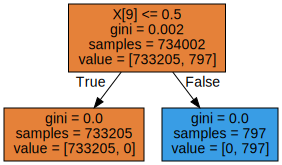

In [78]:
from sklearn import tree
import graphviz
dot_data = tree.export_graphviz(ML,filled=True)
graph = graphviz.Source(dot_data) 
graph

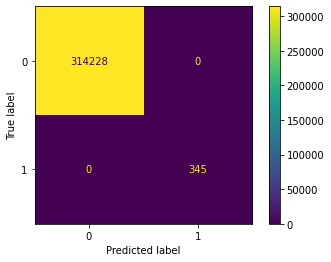

In [83]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm= confusion_matrix(y_test,y_pred)
class_names = [0,1]
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=class_names)
disp.plot()
plt.show()

In [25]:
rf = RandomForestClassifier(n_estimators=100, criterion='entropy', max_depth=None)
rf = rf.fit(new_train,y_train_sampled_df)
Y_predicted_rf = rf.predict(new_test)
Y_pred_train_rf = rf.predict(new_train)

In [26]:
print('\n Confusion Matrix \n')
print(confusion_matrix(Y_predicted_rf, y_test_sampled_df))

ac = accuracy_score(y_test_sampled_df, Y_predicted_rf)
print('\n Macro Averaged Accuracy :'+str(ac))

pr = precision_score(y_test_sampled_df, Y_predicted_rf, average='macro')
print('\n Macro Averaged Precision :'+str(pr))

re = recall_score(y_test_sampled_df, Y_predicted_rf, average='macro')
print('\n Macro Averaged Recall :'+str(re))

fm = f1_score(y_test_sampled_df, Y_predicted_rf, average='macro')
print('\n Macro Averaged F1-Score :'+str(fm))

fm = f1_score(y_test_sampled_df, Y_predicted_rf, average='micro')
print('\n Micro Averaged F1-Score:'+str(fm))


 Confusion Matrix 

[[314637      0]
 [     0 313823]]

 Macro Averaged Accuracy :1.0

 Macro Averaged Precision :1.0

 Macro Averaged Recall :1.0

 Macro Averaged F1-Score :1.0

 Micro Averaged F1-Score:1.0


In [27]:
from sklearn.ensemble import GradientBoostingClassifier
gb= GradientBoostingClassifier()
gb = gb.fit(new_train, y_train_sampled_df)
Y_predicted_gb = gb.predict(new_test)
Y_pred_train_gb = gb.predict(new_train)

In [28]:
print('\n Confusion Matrix \n')
print(confusion_matrix(Y_predicted_gb, y_test_sampled_df))

ac = accuracy_score(y_test_sampled_df, Y_predicted_gb)
print('\n Macro Averaged Accuracy :'+str(ac))

pr = precision_score(y_test_sampled_df, Y_predicted_gb, average='macro')
print('\n Macro Averaged Precision :'+str(pr))

re = recall_score(y_test_sampled_df,Y_predicted_gb, average='macro')
print('\n Macro Averaged Recall :'+str(re))

fm = f1_score(y_test_sampled_df, Y_predicted_gb, average='macro')
print('\n Macro Averaged F1-Score :'+str(fm))

fm = f1_score(y_test_sampled_df,Y_predicted_gb, average='micro')
print('\n Micro Averaged F1-Score:'+str(fm))


 Confusion Matrix 

[[314637      0]
 [     0 313823]]

 Macro Averaged Accuracy :1.0

 Macro Averaged Precision :1.0

 Macro Averaged Recall :1.0

 Macro Averaged F1-Score :1.0

 Micro Averaged F1-Score:1.0
